<a id = "cell_Preprocessing"></a>
## 1. Data Preprocessing

#### **Load necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
ants  bees  grasshopper  moth  wasp


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import os
import pandas as pd
import math
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.losses import categorical_crossentropy

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### **Load the dataset**

In [ ]:
# Data Source - https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset

In [3]:
# Set the paths to the folders containing the image files
grasshopper_path = '/content/drive/MyDrive/Inputs/grasshopper'
bees_path = '/content/drive/MyDrive/Inputs/bees'
moth_path = '/content/drive/MyDrive/Inputs/moth'
wasp_path = '/content/drive/MyDrive/Inputs/wasp'
ants_path = '/content/drive/MyDrive/Inputs/ants'


# get a list of all files in the folder
grasshopper_file_list = os.listdir(grasshopper_path)
bees_file_list = os.listdir(bees_path)
moth_file_list = os.listdir(moth_path)
wasp_file_list = os.listdir(wasp_path)
ants_file_list = os.listdir(ants_path)

# print the total number of files
print(f'Total number of files under grasshopper folder are: {len(grasshopper_file_list)}')
print(f'Total number of files under bees folder are: {len(bees_file_list)}')
print(f'Total number of files under moth folder are: {len(moth_file_list)}')
print(f'Total number of files under wasp folder are: {len(wasp_file_list)}')
print(f'Total number of files under ants folder are: {len(ants_file_list)}')

Total number of files under grasshopper folder are: 485
Total number of files under bees folder are: 500
Total number of files under moth folder are: 497
Total number of files under wasp folder are: 498
Total number of files under ants folder are: 499


In [4]:
# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(grasshopper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(grasshopper_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'grasshopper'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(bees_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(bees_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'bees'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the third folder
for file in os.listdir(moth_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(moth_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'moth'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fourth folder
for file in os.listdir(wasp_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(wasp_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'wasp'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fifth folder
for file in os.listdir(ants_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(ants_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'ants'
    # Add the image data and label to the data list
    data.append((img, label))


* The code processes images of different insects like grasshoppers, bees, moths, wasps, and ants. It reads image files, adjusts their size to 100x100 pixels, and labels them accordingly. The processed images and their labels are stored in a list called 'data'. This list essentially pairs each image with its corresponding insect category. The code repeats this process for each insect category's folder. However, there are some things to consider. It assumes specific folder structures and requires TensorFlow and 'os' modules. Also, using functions could make the code neater and more efficient. Once completed, the 'data' list could be used to train machine learning models to recognize and classify insects based on their images.

#### **Split dataset into training and testing**

In [5]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [6]:
len(train_data)

1732

In [7]:
len(test_data)

743

In [8]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [9]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1732, 100, 100, 3)
Testing matrix shape (743, 100, 100, 3)


In [10]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(['grasshopper' , 'bees', 'moth' , 'wasp' , 'ants'])

# Create a mapping from category strings to integers
category_map = {'grasshopper': 0, 'bees': 1, 'moth': 2, 'wasp': 3, 'ants': 4}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  ants 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  4


### **Visualization**

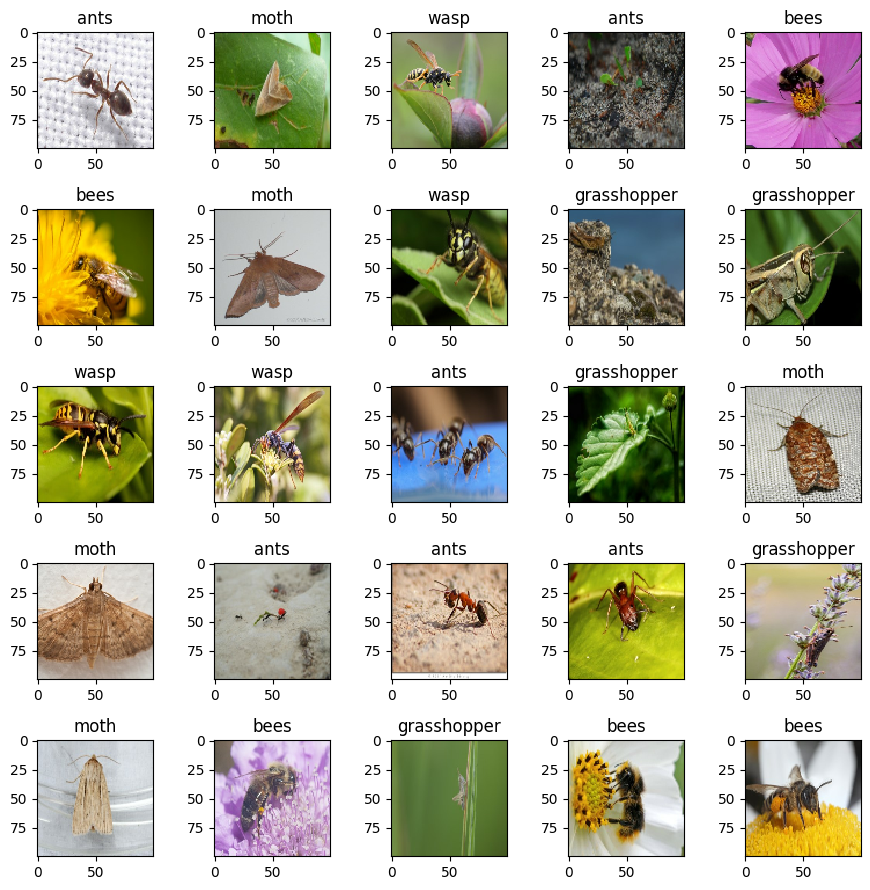

In [11]:
# change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9,9)

labels =  ['grasshopper' , 'bees', 'moth' , 'wasp' , 'ants']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()

<a id = "cell_model"></a>
## 3. Predictive Modeling

In [12]:
img_rows, img_cols = 100, 100
channels = 3

In [13]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

### **Deep learning Model - 01**

In [14]:
def model_1():
    model = Sequential()
    model.add(Flatten(input_shape=(img_rows, img_cols, channels)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.summary()
    return model

- The model is constructed using a linear stack of layers.
- The model consists of the following layers:
  - **Flatten Layer:**
    - Converts multi-dimensional input data (an image) into a one-dimensional array.

  - **Dense Layer (with ReLU activation):**
    - Fully connected layer with 128 neurons.
    - Activation function: Rectified Linear Unit (ReLU).

  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 20% of neurons during training to prevent overfitting.

  - **Dense Layer (with Softmax activation):**
    - Final layer with 5 neurons, representing the classes in a multi-class classification task.
    - Activation function: Softmax, producing a probability distribution over the classes.


### **Deep learning Model - 02**

In [15]:
def model_2():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.summary()
    return model

- The model architecture is designed for image data and includes several convolutional and dense layers.
- The model comprises the following layers:

  - **Convolutional Layer (Conv2D):**
    - Applies 32 filters of size (3, 3) to the input image.
    - Activation function: Rectified Linear Unit (ReLU).

  - **MaxPooling Layer (MaxPooling2D):**
    - Performs max pooling with a pool size of (2, 2), reducing spatial dimensions.
    
  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 25% of neurons during training.
    
  - **Flatten Layer:**
    - Converts the 2D output from the previous layers into a 1D array.
    
  - **Dense Layer (with ReLU activation):**
    - Fully connected layer with 128 neurons.
    - Activation function: Rectified Linear Unit (ReLU).
    
  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 50% of neurons during training.
    
  - **Dense Layer (with Softmax activation):**
    - Final layer with 5 neurons, representing classes in a multi-class classification task.
    - Activation function: Softmax, producing a probability distribution over the classes.

#### **Model Execution - Model 01**

In [16]:
model = model_1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 128)               3840128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3,840,773
Trainable params: 3,840,773
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_train = to_categorical(Y_train, 5)
y_test = to_categorical(Y_test, 5)

Model Building

In [18]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

hist = model.fit(X_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, y_test),
      validation_split=0.2)

Epoch 1/100
14/14 - 4s - loss: 38.7051 - accuracy: 0.2050 - val_loss: 11.0424 - val_accuracy: 0.2127 - 4s/epoch - 302ms/step
Epoch 2/100
14/14 - 0s - loss: 7.2668 - accuracy: 0.2194 - val_loss: 1.8715 - val_accuracy: 0.1898 - 319ms/epoch - 23ms/step
Epoch 3/100
14/14 - 0s - loss: 1.6798 - accuracy: 0.2460 - val_loss: 1.6029 - val_accuracy: 0.2207 - 249ms/epoch - 18ms/step
Epoch 4/100
14/14 - 0s - loss: 1.8375 - accuracy: 0.2229 - val_loss: 1.6014 - val_accuracy: 0.2261 - 242ms/epoch - 17ms/step
Epoch 5/100
14/14 - 0s - loss: 1.7444 - accuracy: 0.2090 - val_loss: 1.7354 - val_accuracy: 0.2180 - 248ms/epoch - 18ms/step
Epoch 6/100
14/14 - 0s - loss: 1.6827 - accuracy: 0.2119 - val_loss: 1.6043 - val_accuracy: 0.2086 - 240ms/epoch - 17ms/step
Epoch 7/100
14/14 - 0s - loss: 1.5978 - accuracy: 0.2079 - val_loss: 1.5842 - val_accuracy: 0.2153 - 241ms/epoch - 17ms/step
Epoch 8/100
14/14 - 0s - loss: 1.5945 - accuracy: 0.2223 - val_loss: 1.5977 - val_accuracy: 0.2194 - 322ms/epoch - 23ms/step


Evaluate the model

In [19]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 1.4726
Train accuracy: 0.302 

Test loss: 1.5737
Test accuracy: 0.245


The model's very low training loss of 0.0003 during the training phase shows that its predictions were very close to the actual target values in the training dataset. The model appears to have successfully learned the patterns and relationships present in the training dataset based on the high accuracy (100%) on the training data.

The trained model's performance was less impressive when it was tested on a different dataset (the testing dataset). The actual target values in the testing dataset were significantly different from the model's predictions, as evidenced by the testing loss, which was significantly higher at 3.6491. The test accuracy, which gauges the percentage of instances in the testing dataset that were correctly predicted, was 0.5343 percent, or roughly 53.43%.


Plot history of learning

In [20]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

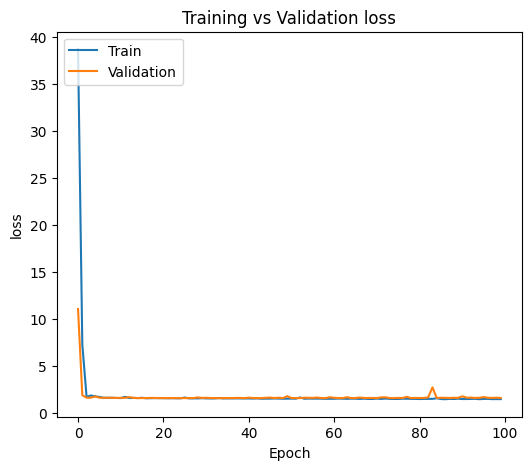

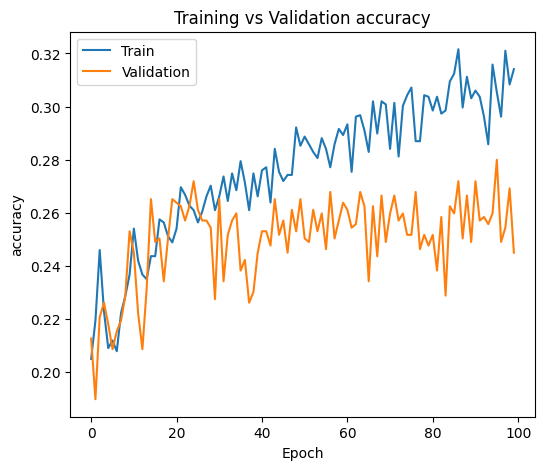

In [21]:
plot_hist(pd.DataFrame(hist.history))

The two plots shown above make it clear that this data works well for training data while the model does function the same way for validation data as well.


Classification Report

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

24/24 [==============================] - 0s 4ms/step
The result of Kappa is : 0.052
The result of the classification report is: 
                precision    recall  f1-score   support

 grasshopper       0.20      0.02      0.03       133
        bees       0.20      0.08      0.12       146
        moth       0.68      0.15      0.25       153
        wasp       0.23      0.95      0.37       152
        ants       0.14      0.01      0.01       159

    accuracy                           0.24       743
   macro avg       0.29      0.24      0.15       743
weighted avg       0.29      0.24      0.16       743



Confusion Matrix

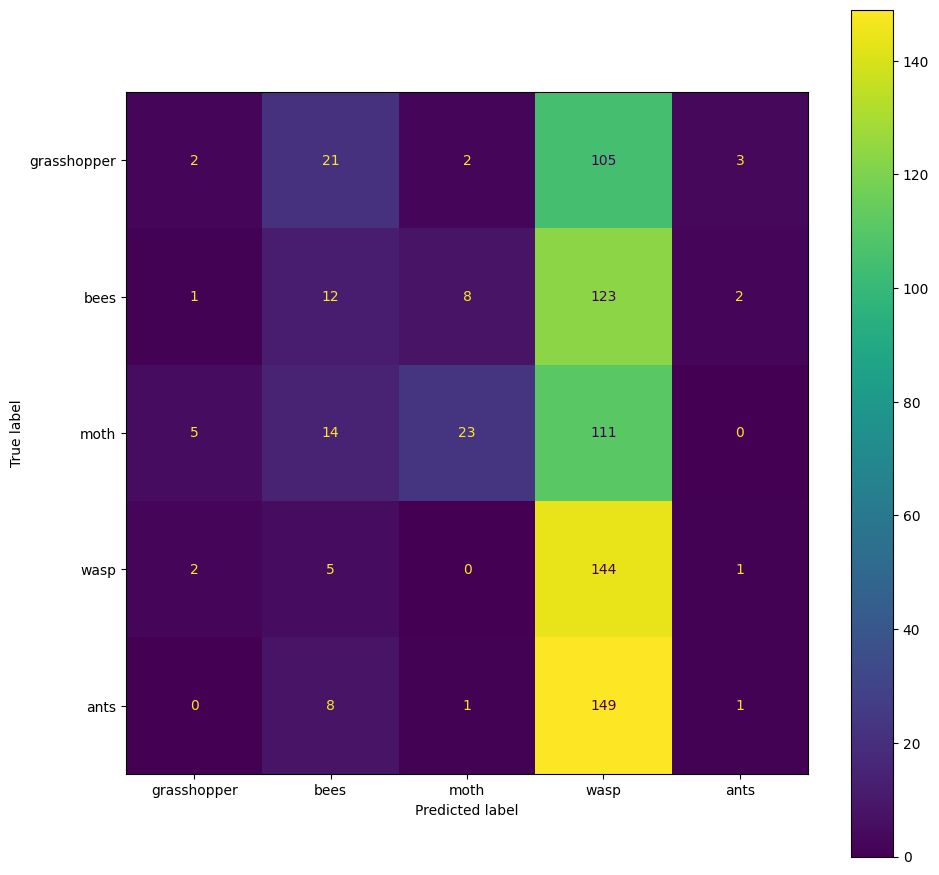

In [23]:
cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

Predictions from Model - 01

In [24]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2/2 [==============================] - 0s 7ms/step


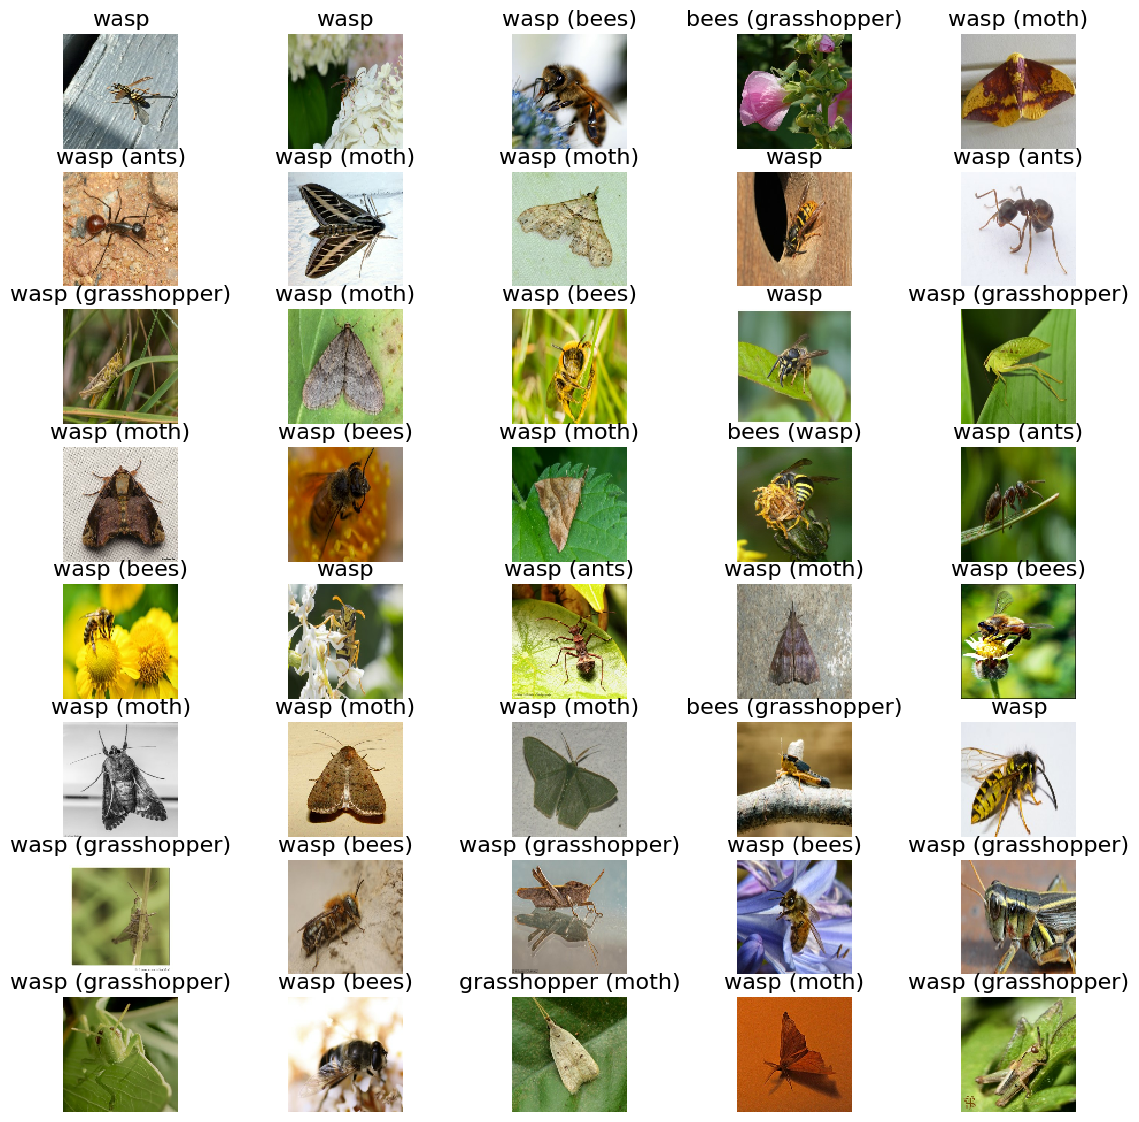

In [25]:
img_range = range(40)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(14,14), titles=titles)

#### **Model Execution - Model 02**

In [26]:
model = model_2()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               9834624   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [27]:
y_train = to_categorical(Y_train, 5)
y_test = to_categorical(Y_test, 5)

Model Building

In [28]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')

hist = model.fit(X_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, y_test),
      validation_split=0.2)

Epoch 1/100
14/14 - 8s - loss: 1.9304 - accuracy: 0.2263 - val_loss: 1.6015 - val_accuracy: 0.2100 - 8s/epoch - 540ms/step
Epoch 2/100
14/14 - 1s - loss: 1.6120 - accuracy: 0.2321 - val_loss: 1.5677 - val_accuracy: 0.3311 - 572ms/epoch - 41ms/step
Epoch 3/100
14/14 - 1s - loss: 1.5902 - accuracy: 0.2766 - val_loss: 1.5711 - val_accuracy: 0.2369 - 513ms/epoch - 37ms/step
Epoch 4/100
14/14 - 1s - loss: 1.5919 - accuracy: 0.2552 - val_loss: 1.5560 - val_accuracy: 0.3499 - 519ms/epoch - 37ms/step
Epoch 5/100
14/14 - 1s - loss: 1.5723 - accuracy: 0.2685 - val_loss: 1.5558 - val_accuracy: 0.2826 - 506ms/epoch - 36ms/step
Epoch 6/100
14/14 - 1s - loss: 1.5578 - accuracy: 0.3106 - val_loss: 1.5502 - val_accuracy: 0.2490 - 578ms/epoch - 41ms/step
Epoch 7/100
14/14 - 0s - loss: 1.5235 - accuracy: 0.3331 - val_loss: 1.5007 - val_accuracy: 0.3836 - 499ms/epoch - 36ms/step
Epoch 8/100
14/14 - 1s - loss: 1.4935 - accuracy: 0.3453 - val_loss: 1.4829 - val_accuracy: 0.3890 - 575ms/epoch - 41ms/step
Ep

Evaluate the model

In [29]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.2246
Train accuracy: 0.9763 

Test loss: 1.0484
Test accuracy: 0.6057


The model's very low training loss of 0.0 during the training phase shows that its predictions were very close to the actual target values in the training dataset. The model appears to have successfully learned the patterns and relationships present in the training dataset based on the high accuracy (100%) on the training data.

The trained model's performance was less impressive when it was tested on a different dataset (the testing dataset). The actual target values in the testing dataset were significantly different from the model's predictions, as evidenced by the testing loss, which was significantly higher at 3.8017. The test accuracy, which gauges the percentage of instances in the testing dataset that were correctly predicted, was 0.5639 percent, or roughly 56.39%.

Plot history of learning

In [30]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

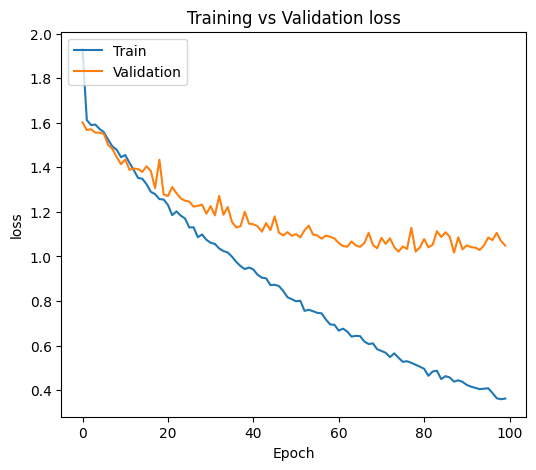

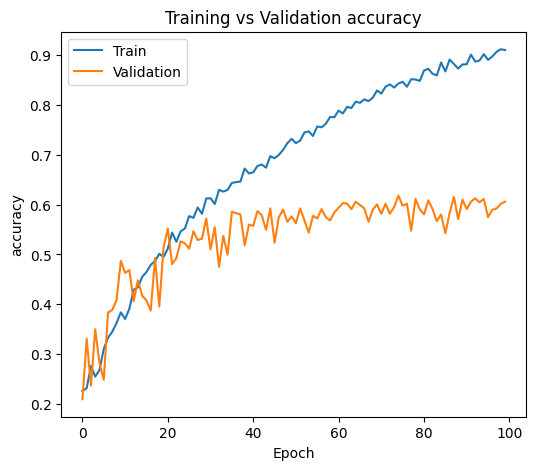

In [31]:
plot_hist(pd.DataFrame(hist.history))

The two plots shown above make it clear that this data works well for training data while the model does not function the same way for validation data. Additionally, we are unable to detect any increases in the accuracy of the validation dataset after the 14th epoch.


Classification Report

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

24/24 [==============================] - 0s 6ms/step
The result of Kappa is : 0.506
The result of the classification report is: 
                precision    recall  f1-score   support

 grasshopper       0.51      0.55      0.53       133
        bees       0.70      0.45      0.54       146
        moth       0.61      0.87      0.72       153
        wasp       0.69      0.62      0.65       152
        ants       0.56      0.53      0.55       159

    accuracy                           0.61       743
   macro avg       0.61      0.60      0.60       743
weighted avg       0.61      0.61      0.60       743



Confusion Matrix

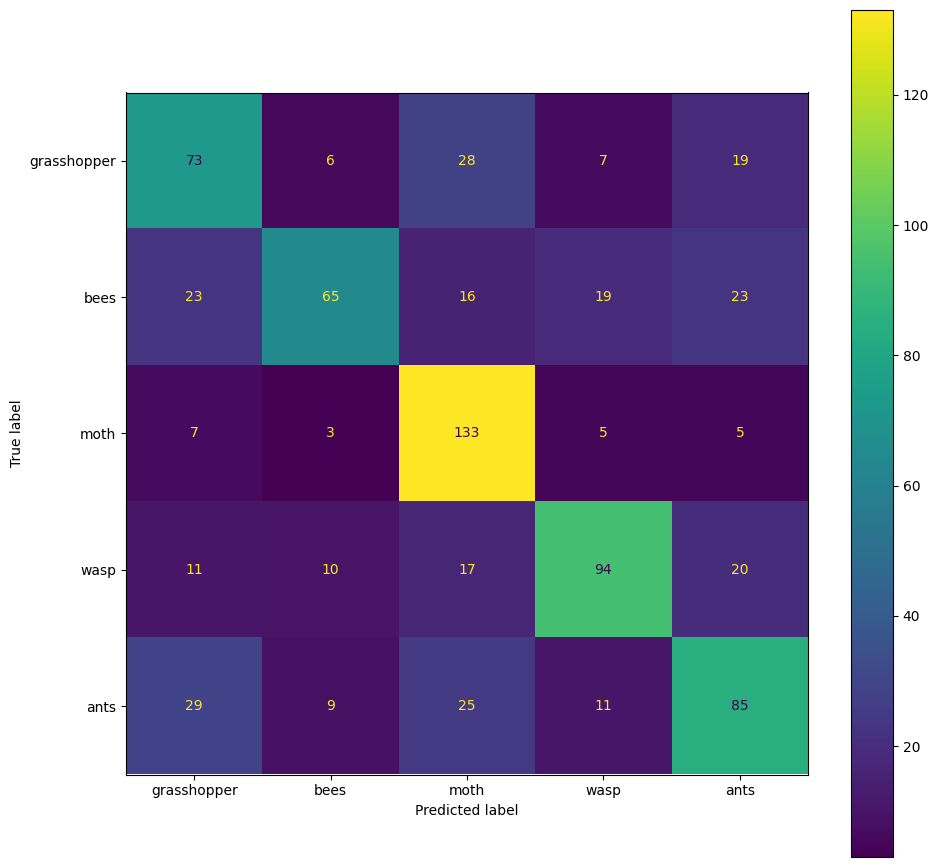

In [33]:
cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

Predictions from Model - 02

In [34]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2/2 [==============================] - 0s 41ms/step


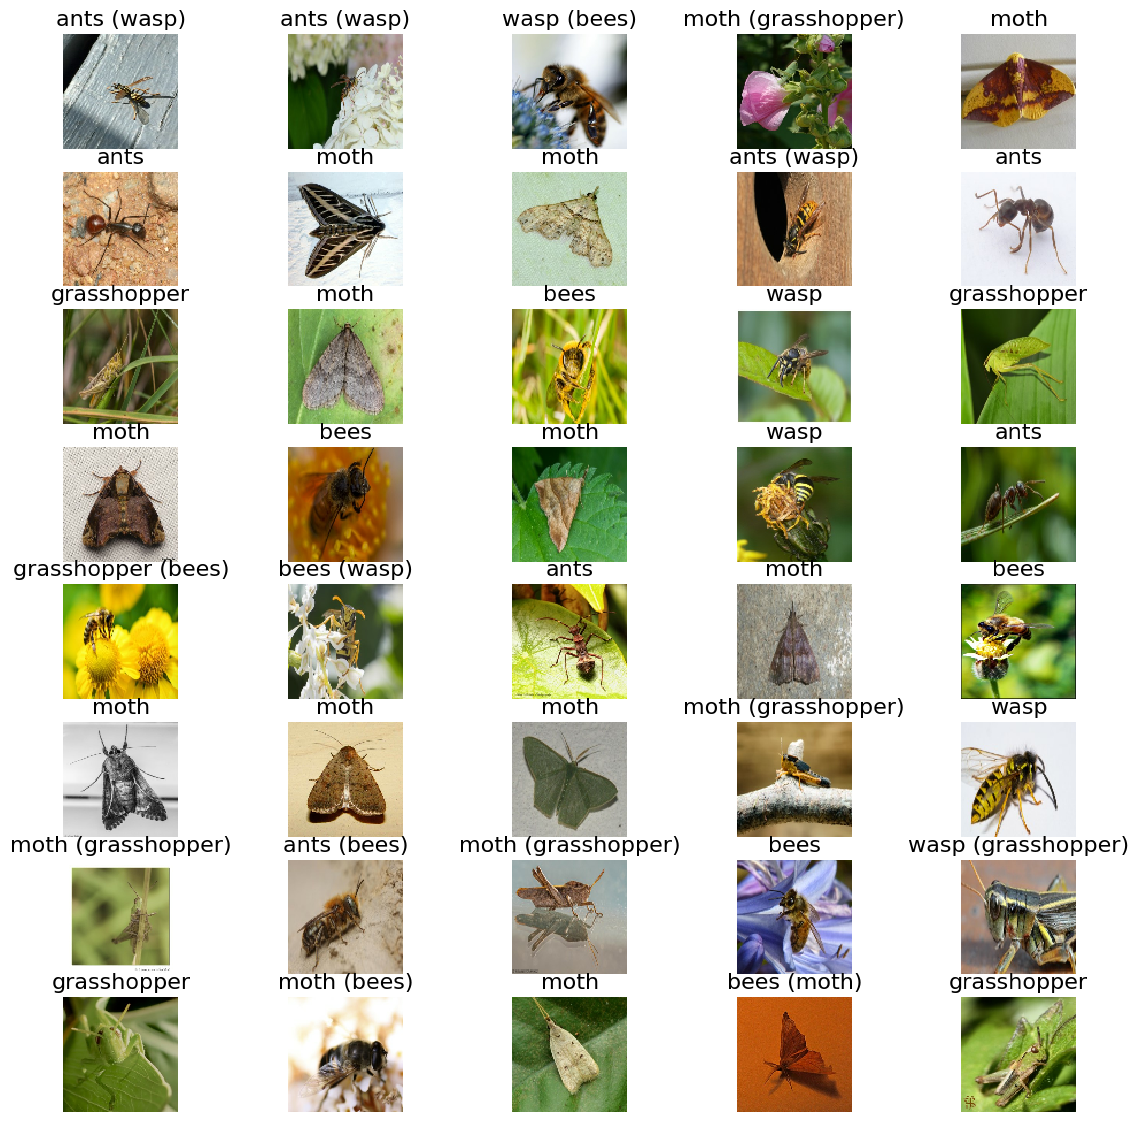

In [35]:
img_range = range(40)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(14,14), titles=titles)